In [79]:
!pip install nltk
!pip install textblob
!pip install wordcloud

import pandas as pd
import numpy as np
from pandas import DataFrame as df
import re 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sea
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
manu=pd.read_csv(r"C:\Users\Karma\OneDrive\Desktop\projects and datasets\datasets\Tweets_ManUtd.csv")
manu

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Karma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,club,id,createdAt,favorites,retweets,text
0,Manchester United,1612834398671454208,2023-01-10 15:31:00+00:00,1955,170,Another December award nomination for this Uni...
1,Manchester United,1612809735757070346,2023-01-10 13:53:00+00:00,2331,168,Will @LisandrMartinez make his first start sin...
2,Manchester United,1612783940892336128,2023-01-10 12:10:30+00:00,3785,282,🔑 Self-belief is key. #MUFC
3,Manchester United,1612763556742586369,2023-01-10 10:49:30+00:00,4344,239,Determined 👊 #MUFC || @BrandonWilliams
4,Manchester United,1612736128464961536,2023-01-10 09:00:30+00:00,2954,225,Train. Improve. Evolve. 🤝 When three key prin...
...,...,...,...,...,...,...
2968,Manchester United,1553427320504999936,2022-07-30 17:08:29+00:00,16749,1202,ℹ Erik has confirmed that @Cristiano will feat...
2969,Manchester United,1553415119949930499,2022-07-30 16:20:00+00:00,6225,459,"We appreciate you coming out, Oslo — we felt y..."
2970,Manchester United,1553395491303481345,2022-07-30 15:02:00+00:00,3617,232,🎥 @AnthonyElanga gave #MUTV his post-match rea...
2971,Manchester United,1553385172325650435,2022-07-30 14:21:00+00:00,10115,629,More minutes in the legs following a tough pre...


In [80]:
tweets=df(manu['text'])
tweets

,text
0,Another December award nomination for this Uni...
1,Will @LisandrMartinez make his first start sin...
2,🔑 Self-belief is key. #MUFC
3,Determined 👊 #MUFC || @BrandonWilliams
4,Train. Improve. Evolve. 🤝 When three key prin...
...,...
2968,ℹ Erik has confirmed that @Cristiano will feat...
2969,"We appreciate you coming out, Oslo — we felt y..."
2970,🎥 @AnthonyElanga gave #MUTV his post-match rea...
2971,More minutes in the legs following a tough pre...


In [81]:
tweets[['polarity','subjectivity']] = tweets['text'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))
#polarity in range [-1,1] gives us the posivity and negativity of the tweets
#subjectivity in range [0,1] gives the numerical value of how much is factual and how much is subjective
#valer helps us to how positive and negative a sentiment is
#comp score is the sum of all lexicon ratings
for index, row in tweets['text'].iteritems():
    score= sea().polarity_scores(row)
    neg=score['neg']
    neu= score['neu']
    pos=score['pos']
    comp= score['compound']
    if comp <= -0.05:
        tweets.loc[index, 'sentiment'] ='negative'
    elif comp>= 0.05:
        tweets.loc[index , 'sentiment'] = 'positive'
    else:
        tweets.loc[index, 'sentiment']= 'neutral'
    tweets.loc[index,'neg']= neg
    tweets.loc[index,'neu']= neu
    tweets.loc[index,'pos']= pos
    tweets.loc[index,'compound']= comp
tweets

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Another December award nomination for this Uni...,0.000000,0.000000,positive,0.000,0.610,0.390,0.7930
1,Will @LisandrMartinez make his first start sin...,0.250000,0.333333,positive,0.000,0.766,0.234,0.6369
2,🔑 Self-belief is key. #MUFC,0.000000,1.000000,neutral,0.000,1.000,0.000,0.0000
3,Determined 👊 #MUFC || @BrandonWilliams,0.000000,0.000000,positive,0.000,0.556,0.444,0.3400
4,Train. Improve. Evolve. 🤝 When three key prin...,0.068182,0.727273,positive,0.000,0.896,0.104,0.4404
...,...,...,...,...,...,...,...,...
2968,ℹ Erik has confirmed that @Cristiano will feat...,0.000000,0.700000,neutral,0.000,1.000,0.000,0.0000
2969,"We appreciate you coming out, Oslo — we felt y...",0.125000,0.200000,positive,0.000,0.769,0.231,0.6597
2970,🎥 @AnthonyElanga gave #MUTV his post-match rea...,0.000000,0.100000,positive,0.000,0.780,0.220,0.4767
2971,More minutes in the legs following a tough pre...,0.037037,0.477778,negative,0.130,0.870,0.000,-0.1280


In [82]:
tweets_neg = tweets[tweets['sentiment']== 'negative']
tweets_neg

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
20,A #CarabaoCup semi-final place is up for grabs...,-0.035714,0.571429,negative,0.114,0.886,0.000,-0.2942
91,Turning defence into attack with pace and powe...,0.000000,0.000000,negative,0.188,0.727,0.085,-0.4019
115,After missing out on Tuesday night due to inju...,-0.108333,0.141667,negative,0.237,0.763,0.000,-0.6476
145,"Big stop, @D_DeGea! 👏 #MUFC || #MUNBOU",0.000000,0.100000,negative,0.333,0.667,0.000,-0.3595
146,👁 Defence to attack in the blink of an eye. ...,0.000000,0.000000,negative,0.188,0.727,0.085,-0.4019
...,...,...,...,...,...,...,...,...
2849,"Brighton take the lead through Gross, 0-1. #M...",0.000000,0.000000,negative,0.256,0.744,0.000,-0.4767
2867,⏹ Our U21s are beaten on the opening day of th...,0.000000,0.000000,negative,0.123,0.877,0.000,-0.4753
2948,Missed this. 📍 Home #MUFC https://t.co/sXUl...,0.000000,0.000000,negative,0.355,0.645,0.000,-0.2960
2971,More minutes in the legs following a tough pre...,0.037037,0.477778,negative,0.130,0.870,0.000,-0.1280


In [83]:
tweets_pos = tweets[tweets['sentiment']== 'positive']
tweets_pos

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Another December award nomination for this Uni...,0.000000,0.000000,positive,0.0,0.610,0.390,0.7930
1,Will @LisandrMartinez make his first start sin...,0.250000,0.333333,positive,0.0,0.766,0.234,0.6369
3,Determined 👊 #MUFC || @BrandonWilliams,0.000000,0.000000,positive,0.0,0.556,0.444,0.3400
4,Train. Improve. Evolve. 🤝 When three key prin...,0.068182,0.727273,positive,0.0,0.896,0.104,0.4404
8,Monday's Carrington workout was a good one! ✊🔥...,0.875000,0.600000,positive,0.0,0.738,0.262,0.4926
...,...,...,...,...,...,...,...,...
2959,United family ❤ The very best of luck to our ...,0.500000,0.695000,positive,0.0,0.596,0.404,0.8968
2965,Welcoming a new face to our coaching team... ...,0.468182,0.602273,positive,0.0,0.650,0.350,0.7906
2966,💬 The boss shared his reaction to today's frie...,0.375000,0.500000,positive,0.0,0.641,0.359,0.6808
2969,"We appreciate you coming out, Oslo — we felt y...",0.125000,0.200000,positive,0.0,0.769,0.231,0.6597


In [84]:
tweets_neu = tweets[tweets['sentiment']== 'neutral']
tweets_neu

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
2,🔑 Self-belief is key. #MUFC,0.000,1.000000,neutral,0.0,1.0,0.0,0.0
5,Sights set on an Old Trafford cup night! 👀 #M...,0.125,0.200000,neutral,0.0,1.0,0.0,0.0
6,It's time for the last eight! 🙌 #MUFC || #Car...,0.000,0.066667,neutral,0.0,1.0,0.0,0.0
7,Diogo ❤️ @PremierLeague #MUFC || @DalotDiogo,0.000,0.000000,neutral,0.0,1.0,0.0,0.0
10,"Buenas, @D_DeGea! 🤙 #MUFC || #CarabaoCup http...",0.000,0.000000,neutral,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2962,🧠 Insight into how our line-up will look on Su...,0.000,0.000000,neutral,0.0,1.0,0.0,0.0
2963,All set for Erik’s first-ever game at Old Traf...,-0.150,0.300000,neutral,0.0,1.0,0.0,0.0
2964,➡️ Now we turn our attentions to our final pre...,0.050,0.600000,neutral,0.0,1.0,0.0,0.0
2967,Plenty more to come 👊 📈 @ChrisEriksen8 #MUFC...,0.500,0.500000,neutral,0.0,1.0,0.0,0.0


In [85]:
count_tweets = df({
                   'total': [len(tweets_pos),len(tweets_neg) ,len(tweets_neu)]
                   },index=['poitive' , 'negative' , 'neutral'])
count_tweets=count_tweets.join(df(100*count_tweets["total"]/len(tweets)).rename(columns={"total":"percentage"}))
count_tweets

,total,percentage
poitive,1330,44.735957
negative,122,4.103599
neutral,1521,51.160444


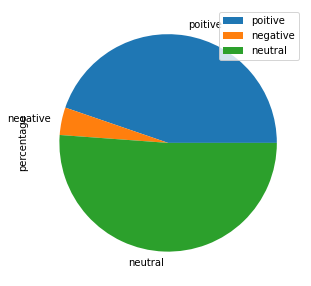

In [86]:
plot=count_tweets.plot.pie(y= 'percentage',figsize=(5,5),)
plot

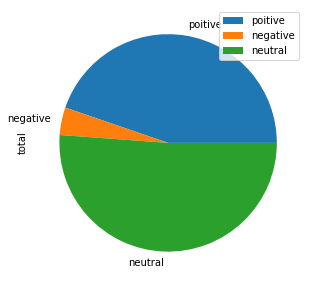